In [1]:
import warnings
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pycmqlib3/")
sys.path.append("C:/dev/pycmqlib3/misc_scripts/")
warnings.filterwarnings('ignore')
import misc
import data_handler as dh
import backtest


In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP'] #, 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
sim_start_dict = { 'c': datetime.date(2008,10,1), 'm': datetime.date(2010,10,1),
    'y': datetime.date(2010,1,1), 'l': datetime.date(2008,1,1), 'rb':datetime.date(2010,1,1),
    'p': datetime.date(2010,1,1), 'cu':datetime.date(2010,1,1), 'al':datetime.date(2010,1,1),
    'zn':datetime.date(2010,1,1), 'au':datetime.date(2010,1,1), 'v': datetime.date(2010,1,1),
    'a': datetime.date(2010,1,1), 'ru':datetime.date(2010,1,1), 'ag':datetime.date(2012,7,6),
    'i': datetime.date(2013,12,13), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,5,24),
    'CF':datetime.date(2008,1,1),  'TA':datetime.date(2007,2,15),
    'PM':datetime.date(2012,10,1), 'RM':datetime.date(2013,3,16),  'SR':datetime.date(2006,1,6),
    'FG':datetime.date(2013,2,1),  'OI':datetime.date(2013,6,1),  'RI':datetime.date(2013,6,1),
    'WH':datetime.date(2014,2,1),  'pp':datetime.date(2014,4,28),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2011,12,23),  'TF':datetime.date(2014,4,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,17),
    'jd':datetime.date(2014,1,6),  'ni':datetime.date(2015,5,26),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2014,5,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,5,17), 'CY': datetime.date(2017, 7, 17), 'AP': datetime.date(2018, 2, 26),
    'TS': datetime.date(2018, 8, 17), 'fu': datetime.date(2018, 7, 16), 'sc': datetime.date(2018, 6, 25),
    'b': datetime.date(2017, 12, 26), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,11,1),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 4, 1), 'sp': datetime.date(2019, 1, 24),
    'CJ': datetime.date(2019, 8, 1), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2019, 12, 9),
    'eb': datetime.date(2019, 12, 1), 'eg': datetime.date(2019, 2, 13), 'rr': datetime.date(2019, 8, 19),
    'pg': datetime.date(2020, 10, 1), 'lu': datetime.date(2020, 8, 1),}

In [3]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']

start_date = datetime.date(2010,1,1)
end_date = datetime.date(2021,3,3)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y', '10y']

sim_products = ind_all_mkts + ags_all_mkts
need_shift = 1
freq = 'd'
delimiter = '-'

dbtbl_prefix = ''
args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
v_args  = {'roll_rule': '-28b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []
atr_win = 20
for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date    
    for idy, nb in enumerate([1, 2]):
        use_args['n'] = nb
        print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
        df = misc.nearby(asset, **use_args)
        if freq == 'm':
            df = misc.cleanup_mindata(df, asset)
        if (idx == 0) and (idy == 0) and (freq == 'm'):
            df_list.append(df[['date', 'min_id']])
        xdf = df[field_list]
        #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2010, 1, 1), 'end_date': datetime.date(2021, 3, 3), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2010, 1, 1), 'end_date': datetime.date(2021, 3, 3), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 3, 3), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 3, 3), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2013, 12, 13), 'end_date': datetime.date(2021, 3, 3), 'n': 1}
loading mkt = i, nb = 2, args = {'

loading mkt = bu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 11, 1), 'end_date': datetime.date(2021, 3, 3), 'n': 1}
loading mkt = bu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 11, 1), 'end_date': datetime.date(2021, 3, 3), 'n': 2}
loading mkt = sc, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 6, 25), 'end_date': datetime.date(2021, 3, 3), 'n': 1}
continuous contract stopped at sc1808 for start = 2018-06-25, expiry= 2018-07-03
loading mkt = sc, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 6, 25), 'end_date': datetime.date(2021, 3, 3), 'n': 2}
loading mkt = fu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 7, 1

In [5]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    resp_func = input_args.get('rsp_func', 'sign')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    data_field = ''
    for col in df.columns:
        col_split = col.split(delimiter)
        if col_split[0][:-1] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        
        if run_mode == 'ryield':
            data_field = 'ryield'
        elif run_mode == 'basmom':
            data_field = 'basmom'
        elif run_mode == 'ryieldma':
            xdf[delimiter.join((asset + str(1), 'ryieldma'))] = xdf[delimiter.join((asset + str(1), 'ryield'))].rolling(ma_win).mean()
            data_field = 'ryieldma'
        elif run_mode == 'basmomma':
            xdf[delimiter.join((asset + str(1), 'basmomma'))] = xdf[delimiter.join((asset + str(1), 'basmom'))].rolling(ma_win).mean()
            data_field = 'basmomma'
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill') * 10.0
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        if 'ma' == run_mode[-2:]:
            xdf[delimiter.join((asset + str(1), 'signal_r'))] = xdf[delimiter.join((asset + str(1), data_field))] \
                                                            - xdf[delimiter.join((asset + str(1), data_field[:-2]))]
        else:
            xdf[delimiter.join((asset + str(1), 'signal_r'))] = xdf[delimiter.join((asset + str(1), data_field))] - params[0]
        

    select_cols = []
    for col in xdf.columns:
        col_split = col.split(delimiter)
        if (col_split[0] in mod_prod_list):
            select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    adf['rebal_seqno'] = range(len(adf.index))
    
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            if run_mode in ['ryield', 'basmom']:
                long_tmp.loc[(adf[delimiter.join((asset, data_field))]>  params[0]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(adf[delimiter.join((asset, data_field))]<= params[0]) & rebal_flag, asset] = 0.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]< params[1]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]>=params[1]) & rebal_flag, asset] = 0.0
            elif run_mode in ['ryieldma', 'basmomma']:
                long_tmp.loc[(adf[delimiter.join((asset, data_field))] < adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(adf[delimiter.join((asset, data_field))] >=adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 0.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]> adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(adf[delimiter.join((asset, data_field))]<=adf[delimiter.join((asset, data_field[:-2]))]) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp
        short_pos = short_pos + short_tmp
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk / rebal_freq \
                    /(adf['prod_count'] * adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk / rebal_freq \
                    /(adf['prod_count'] *adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, 'open'))]
        adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res


In [6]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    rank_field = ''
    for col in df.columns:
        col_split = col.split(delimiter)
        if col_split[0][:-1] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]

    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        if run_mode in ['ryield', 'basmom']:
            rank_field = run_mode
        elif run_mode == 'ryieldma':
            xdf[delimiter.join((asset + str(1), 'ryieldma'))] = xdf[delimiter.join((asset + str(1), 'ryield'))].rolling(ma_win).mean()
            rank_field = 'ryieldma'
        elif run_mode == 'basmomma':
            xdf[delimiter.join((asset + str(1), 'basmomma'))] = xdf[delimiter.join((asset + str(1), 'basmom'))].rolling(ma_win).mean()
            rank_field = 'basmomma'
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill') * 10.0
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close

    select_cols = []
    for col in xdf.columns:
        col_split = col.split(delimiter)
        if (col_split[0] in mod_prod_list):
            select_cols.append(col)    
    
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_sum = long_tmp.sum(axis=1)
        short_sum = short_tmp.sum(axis=1)
        long_pos = long_pos + long_tmp.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp.div(short_sum,axis=0)

    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk / rebal_freq \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk / rebal_freq \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, 'open'))]
        adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res

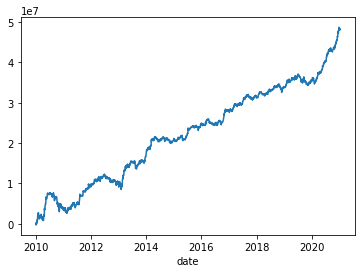

                 tscarry-ryield-mixed_metal_mkts-1-1-5-0.2
sharp_ratio_10y                                   1.709804
sharp_ratio_1y                                    4.191741
sharp_ratio_2y                                    2.592674
sharp_ratio_3y                                    2.188758
sharp_ratio_4y                                    2.084870
sharp_ratio_5y                                    1.956788
sharp_ratio_6y                                    1.911198
sharp_ratio_8y                                    1.904950
std_pnl_10y                                  171274.832310
std_pnl_1y                                   192572.159494
std_pnl_2y                                   180761.452491
std_pnl_3y                                   166467.312249
std_pnl_4y                                   159256.935753
std_pnl_5y                                   156593.064169
std_pnl_6y                                   154452.159338
std_pnl_8y                                   166230.5516

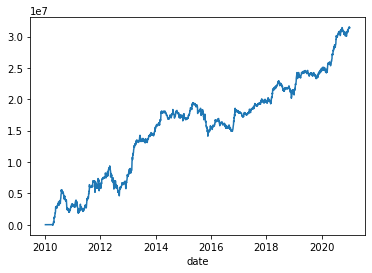

                 tscarry-basmom-mixed_metal_mkts-60-1-10-0.2
sharp_ratio_10y                                     1.126769
sharp_ratio_1y                                      2.750204
sharp_ratio_2y                                      2.138740
sharp_ratio_3y                                      1.694768
sharp_ratio_4y                                      1.558427
sharp_ratio_5y                                      1.495077
sharp_ratio_6y                                      1.027024
sharp_ratio_8y                                      1.278876
std_pnl_10y                                    165393.937203
std_pnl_1y                                     158321.466929
std_pnl_2y                                     150038.575380
std_pnl_3y                                     152443.968921
std_pnl_4y                                     141157.902445
std_pnl_5y                                     139215.300841
std_pnl_6y                                     144867.223014
std_pnl_8y              

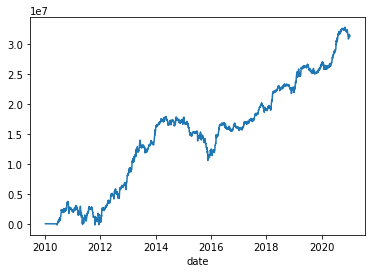

                 tscarry-basmom-mixed_metal_mkts-100-1-10-0.2
sharp_ratio_10y                                      1.096348
sharp_ratio_1y                                       1.741430
sharp_ratio_2y                                       1.711515
sharp_ratio_3y                                       1.672841
sharp_ratio_4y                                       1.691558
sharp_ratio_5y                                       1.670117
sharp_ratio_6y                                       0.912877
sharp_ratio_8y                                       1.126818
std_pnl_10y                                     175241.422684
std_pnl_1y                                      174527.458329
std_pnl_2y                                      167934.501697
std_pnl_3y                                      159915.121573
std_pnl_4y                                      150140.635578
std_pnl_5y                                      150617.380051
std_pnl_6y                                      160005.778544
std_pnl_

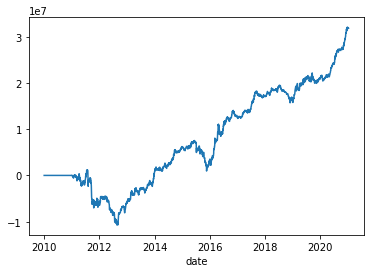

                 tscarry-basmom-mixed_metal_mkts-240-1-10-0.2
sharp_ratio_10y                                      0.972468
sharp_ratio_1y                                       4.189014
sharp_ratio_2y                                       2.674096
sharp_ratio_3y                                       1.838436
sharp_ratio_4y                                       1.923519
sharp_ratio_5y                                       2.008305
sharp_ratio_6y                                       1.430129
sharp_ratio_8y                                       1.605271
std_pnl_10y                                     213630.423981
std_pnl_1y                                      162853.469688
std_pnl_2y                                      187892.415261
std_pnl_3y                                      173727.476732
std_pnl_4y                                      164322.735353
std_pnl_5y                                      187577.536814
std_pnl_6y                                      195208.910743
std_pnl_

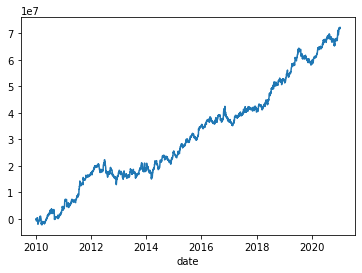

                 xscarry-ryieldma-mixed_metal_mkts-1-1-5-0.2
sharp_ratio_10y                                     1.232969
sharp_ratio_1y                                      2.061937
sharp_ratio_2y                                      1.777640
sharp_ratio_3y                                      1.821030
sharp_ratio_4y                                      1.607031
sharp_ratio_5y                                      1.331307
sharp_ratio_6y                                      1.464502
sharp_ratio_8y                                      1.220530
std_pnl_10y                                    359667.468690
std_pnl_1y                                     384945.407198
std_pnl_2y                                     375712.167244
std_pnl_3y                                     366159.798300
std_pnl_4y                                     354613.452282
std_pnl_5y                                     355938.779097
std_pnl_6y                                     346012.904730
std_pnl_8y              

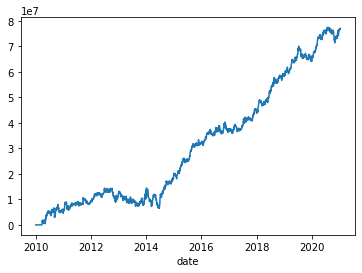

                 xscarry-ryieldma-mixed_metal_mkts-1-50-5-0.2
sharp_ratio_10y                                      1.252860
sharp_ratio_1y                                       1.809945
sharp_ratio_2y                                       1.561427
sharp_ratio_3y                                       1.870044
sharp_ratio_4y                                       1.788424
sharp_ratio_5y                                       1.592364
sharp_ratio_6y                                       1.734536
sharp_ratio_8y                                       1.368408
std_pnl_10y                                     370719.480476
std_pnl_1y                                      391207.512763
std_pnl_2y                                      380291.150223
std_pnl_3y                                      373583.959175
std_pnl_4y                                      362223.964583
std_pnl_5y                                      362768.253756
std_pnl_6y                                      353357.204718
std_pnl_

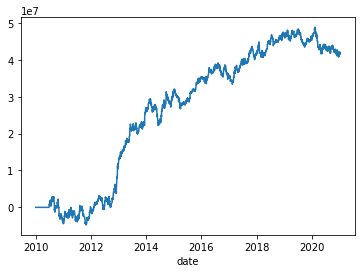

                 xscarry-basmom-mixed_metal_mkts-110-1-5-0.2
sharp_ratio_10y                                     0.854820
sharp_ratio_1y                                     -0.826395
sharp_ratio_2y                                     -0.397271
sharp_ratio_3y                                      0.003587
sharp_ratio_4y                                      0.336569
sharp_ratio_5y                                      0.282265
sharp_ratio_6y                                      0.338399
sharp_ratio_8y                                      0.689848
std_pnl_10y                                    350636.162214
std_pnl_1y                                     351541.486541
std_pnl_2y                                     335202.124917
std_pnl_3y                                     321326.923901
std_pnl_4y                                     316843.091748
std_pnl_5y                                     318794.160612
std_pnl_6y                                     311804.743312
std_pnl_8y              

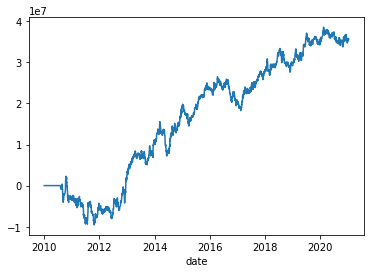

                 xscarry-basmom-mixed_metal_mkts-140-1-5-0.2
sharp_ratio_10y                                     0.729572
sharp_ratio_1y                                      0.019407
sharp_ratio_2y                                      0.576235
sharp_ratio_3y                                      0.520279
sharp_ratio_4y                                      0.804175
sharp_ratio_5y                                      0.497773
sharp_ratio_6y                                      0.551159
sharp_ratio_8y                                      0.782594
std_pnl_10y                                    347505.673335
std_pnl_1y                                     321929.710257
std_pnl_2y                                     326383.101380
std_pnl_3y                                     320449.265837
std_pnl_4y                                     316837.981432
std_pnl_5y                                     319814.522160
std_pnl_6y                                     313953.856232
std_pnl_8y              

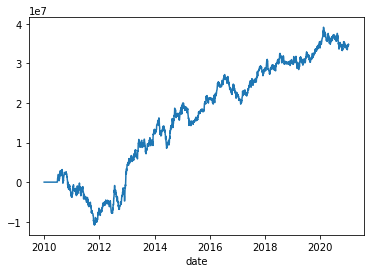

                 xscarry-basmomma-mixed_metal_mkts-90-20-5-0.2
sharp_ratio_10y                                       0.696332
sharp_ratio_1y                                       -0.005166
sharp_ratio_2y                                        0.458652
sharp_ratio_3y                                        0.449624
sharp_ratio_4y                                        0.678489
sharp_ratio_5y                                        0.559171
sharp_ratio_6y                                        0.517058
sharp_ratio_8y                                        0.719143
std_pnl_10y                                      357815.803083
std_pnl_1y                                       362074.298217
std_pnl_2y                                       346602.769554
std_pnl_3y                                       320503.589516
std_pnl_4y                                       311806.175647
std_pnl_5y                                       319889.755990
std_pnl_6y                                       315268

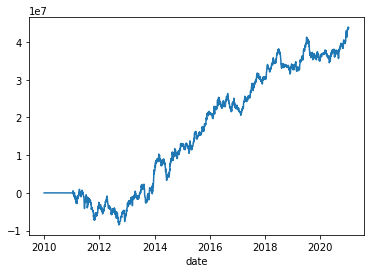

                 xscarry-basmomma-mixed_metal_mkts-230-20-5-0.2
sharp_ratio_10y                                        0.792823
sharp_ratio_1y                                         1.404217
sharp_ratio_2y                                         1.051371
sharp_ratio_3y                                         0.906875
sharp_ratio_4y                                         1.092081
sharp_ratio_5y                                         0.894389
sharp_ratio_6y                                         1.000661
sharp_ratio_8y                                         1.076088
std_pnl_10y                                       360684.766466
std_pnl_1y                                        340137.093416
std_pnl_2y                                        345685.029047
std_pnl_3y                                        328640.689778
std_pnl_4y                                        320621.292407
std_pnl_5y                                        332799.996050
std_pnl_6y                              

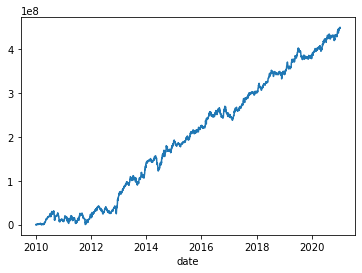

date
2020-12-11    4.442932e+08
2020-12-14    4.416140e+08
2020-12-15    4.358572e+08
2020-12-16    4.384677e+08
2020-12-17    4.383651e+08
2020-12-18    4.400224e+08
2020-12-21    4.416247e+08
2020-12-22    4.438500e+08
2020-12-23    4.427518e+08
2020-12-24    4.447739e+08
2020-12-25    4.451224e+08
2020-12-28    4.464851e+08
2020-12-29    4.470789e+08
2020-12-30    4.455988e+08
2020-12-31    4.479042e+08
2021-01-04    4.463373e+08
2021-01-05    4.466374e+08
2021-01-06    4.490875e+08
2021-01-07    4.481242e+08
2021-01-08    4.473273e+08
dtype: float64
                  rb-pos        hc-pos        i-pos         j-pos  \
date                                                                
2010-01-04      0.000000  0.000000e+00     0.000000      0.000000   
2010-01-05   -366.452724  0.000000e+00     0.000000      0.000000   
2010-01-06   -732.905447  0.000000e+00     0.000000      0.000000   
2010-01-07  -1099.358171  0.000000e+00     0.000000      0.000000   
2010-01-08  -1465.810895  

In [8]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni', 'sn', 'pb']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'ni', 'sn', \
               'l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd'] 
# 'SM', "SF", 'au', 'ag', 'fu', 'eg', 'b', 'AP']

product_list = metal_mixed_mkts + petro_mixed_mkts #commod_mkts # 
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'ind_mixed_mkts'

sim_name = 'tscarry'
run_mode = 'nryield'

start_date = datetime.date(2010,1,1)
end_date = datetime.date(2021,2,19)
quant = 0.2
save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quant), str(end_date)]))
#save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'
pos_std = 1
std_win = 20
win = 60
ma_win = 1
rebal = 5
params = [0.0, 0.0]

index_list = range(10, 250, 10) # [1, 5] + [i for i in range(10, 130, 10)]  #range(8, 44, 4) # 
column_list = [1, 3, 5, 10, 15, 20] #range(10, 130, 10) #  [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #
sratio = {}
run_sratio = False
run_pos_sum = True
pos_sum = pd.DataFrame()
pos_list = []
scenarios = list(itertools.product(index_list, column_list))
#ind_metal_mkts
#scenarios = [('tscarry', 'ryield', 1.0, 1, 1, 5, [0.0, 0.0]), \
#             ('tscarry', 'basmom', 1.0, 60, 1, 10, [0.0, 0.0]), \
#             ('tscarry', 'basmom', 1.0, 100, 1, 10, [0.0, 0.0]),\
#             ('tscarry', 'basmom', 1.0, 240, 1, 10, [0.0, 0.0]),\
#             ('xscarry', 'ryieldma', 1.0, 1, 1, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'ryieldma', 1.0, 1,50, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'basmom', 1.0, 110, 1, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'basmom', 1.0, 140, 1, 5, [0.0, 0.0], 0.25), 
#             ('xscarry', 'basmomma', 1.0, 90, 20, 5, [0.0, 0.0], 0.25), \
#             ('xscarry', 'basmomma', 1.0, 230, 20, 5, [0.0, 0.0], 0.25), ]
#('xscarry', 'basmom', 170, 1, 5, [0.0, 0.0], 0.25), \
#('xscarry', 'basmom', 210, 1, 5, [0.0, 0.0], 0.25), \
#commod_mkts
#scenarios = [('tscarry', 'ryield', 3.0, 1, 1, 1, [0.0, 0.0]), \
#             ('tscarry', 'basmom', 1.0, 70, 1, 1, [0.0, 0.0]), \
#             ('tscarry', 'basmom', 1.0, 110, 1, 1, [0.0, 0.0]),\
#             ('tscarry', 'basmom', 1.0, 230, 1, 1, [0.0, 0.0]),\
#             ('xscarry', 'ryieldma', 1.0, 1, 1, 1, [0.0, 0.0], 0.2), \
#             ('xscarry', 'ryieldma', 1.0, 1, 30, 1, [0.0, 0.0], 0.2), \
#             ('xscarry', 'ryieldma', 1.0, 1, 120, 1, [0.0, 0.0], 0.2),\
#             #('xscarry', 'basmom', 1.0, 10, 1, 10, [0.0, 0.0], 0.2), \
#             #('xscarry', 'basmom', 1.0, 30, 1, 10, [0.0, 0.0], 0.2), \
#             ('xscarry', 'basmom', 1.5, 100, 1, 1, [0.0, 0.0], 0.2), \
#             ('xscarry', 'basmom', 1.5, 240, 1, 1, [0.0, 0.0], 0.2), \
#             #('xscarry', 'basmomma', 100, 10, 5, [0.0, 0.0], 0.2), \
#             #('xscarry', 'basmomma',240, 10, 5, [0.0, 0.0], 0.2), \
#           ]

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()

for scen in scenarios:
    quantile = quant
    if len(scen) == 2:
        scen_x = scen[0]
        scen_y = scen[1]
        if run_mode in ['ryield']:
            win = 1
            ma_win = 1
            rebal = scen_y 
            if sim_name == 'xscarry':
                quantile = scen_x * 0.1
        elif run_mode in ['basmom']:
            win = scen_x
            ma_win = 1
            rebal = scen_y
        elif run_mode in ['basmomma']:
            win = scen_x
            ma_win = scen_y
            rebal = 5
        elif run_mode in ['nyield']:
            win = scen_x
            
        elif run_mode == 'ryieldma':
            rebal = scen_y
            ma_win = scen_x
        else:
            print("unsupported run_mode")
            continue
    elif len(scen) >= 7:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 7:
                quantile = scen[6]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        params = scen[6]
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = 0.5
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile 
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

port_pnl.plot()
plt.show()
print(port_pnl[-20:])
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:
    print(pos_sum)
if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])


In [7]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    
if run_sratio and save_xl:
    xlfile = save_loc + "sratio_heatmap.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for yr in sratio_years:
        lbl = 'sharp_ratio_' + str(yr) + 'y'
        sratio[yr].to_excel(writer, lbl, startcol= 0, startrow=1)
    writer.save()    